# Imports

In [1]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from hetanalysis import HetAnalysis
from clean import PCBCCleaner
import plotter

output_dir = "../outputs/het_analysis_wrt_time_pcbc/"
SAVE = False

plt.rcParams.update(
    {
        'font.size': 18
    }
)

# %matplotlib widget

# Data Input and Cleaning

In [2]:
df = PCBCCleaner.get_processed_data()

# Group and Output

## Grouping

In [3]:
dhids = list(df['dhid'].unique())
elements = [
    'CU',
    'AU'
]

igs, timeslices = {}, {}

for dhid in dhids:
    dp_timeslices = {} 

    filtered_df = df.query('dhid == @dhid').dropna(subset=elements).reset_index(drop=True)

    indices = filtered_df.index.to_list()

    dp_ig = {} # instantaneous grade
    for index in indices:
        date = filtered_df.iloc[index]['date']
        dp_timeslices[date] = {}
        
        for element in elements:
            if element not in dp_ig:
                dp_ig[element] = []
            
            dp_ig[element].append(filtered_df[element].loc[index])
            
            dp_timeslices[date][element] = HetAnalysis(
                f'{dhid}_{element}_{date}', 
                filtered_df['weight'].loc[:index], 
                filtered_df[element].loc[:index]
                )
    
    timeslices[dhid] = dp_timeslices
    igs[dhid] = dp_ig

## Output

### Output individual graphs

In [4]:
# TODO: make a het_analysis_wrt_time comparison between dp and pcbc with just instantaneous grades

In [5]:
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(10, 8)


    for id, dp_timeslices in timeslices.items():
        save_loc = output_dir + f'{id}/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)

        for element in elements:
            d, h, g = [], [], []
            for date, timeslice in dp_timeslices.items():
                d.append(date)
                h.append(timeslice[element].get_heterogeneity())
                g.append(timeslice[element].get_cml_grade())
                
            fig.clear()
            
            ax = fig.add_subplot()
            sec_ax = ax.twinx()

            sec_ax.scatter(d, h, c='red', s=10)
            sec_ax.plot(d, h, alpha=0.6, c='red', ls='-')
            
            sec_ax.set_ylim(0)
            sec_ax.set_ylabel('Heterogeneity', c='red')

            ax.set_xlim(min(d), max(d))
            ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
            ax.xaxis.set_minor_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))
            ax.set_xlabel('Date')

            for label in ax.get_xticklabels(which='major'):
                label.set(rotation=45, horizontalalignment='right')
            
            ig = igs[id]

            ax.plot(d, ig[element], alpha=0.3, c='blue', ls='-')
            ax.scatter(d, ig[element], c='blue', alpha=0.6, s=3)

            ax.plot(d, g, alpha=0.6, c='blue', ls='-')
            ax.scatter(d, g, c='blue', s=10)

            ax.set_ylabel(f'{element} Cumulative Grade', c='blue')

            ax.set_title(f'{id} {element} GH vs Time')
            ax.grid()

            fig.tight_layout()
            fig.savefig(save_loc + f'{id}_{element}.svg', format='svg')

### Output H-G wrt T Graphs

/var/folders/_x/r7wxfm355p1dqy5lc636rn240000gn/T/ipykernel_63259/444254270.py:62: UserWarning: Attempting to set identical left == right == 19266.0 results in singular transformations; automatically expanding.
  ax.set_xlim(min(w), max(w))


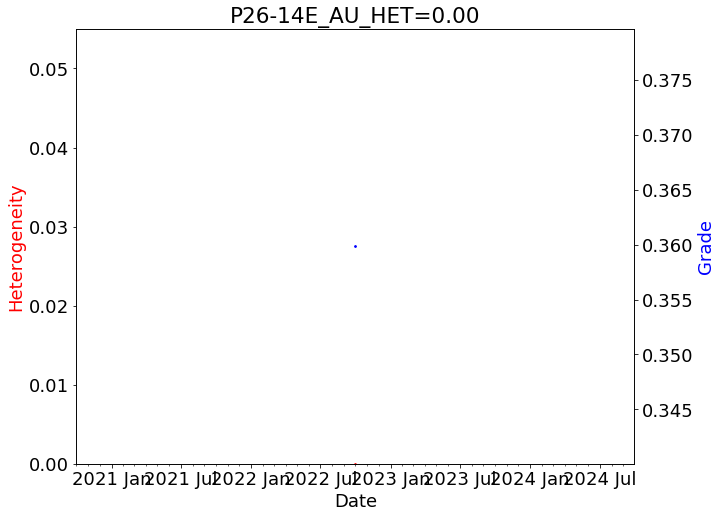

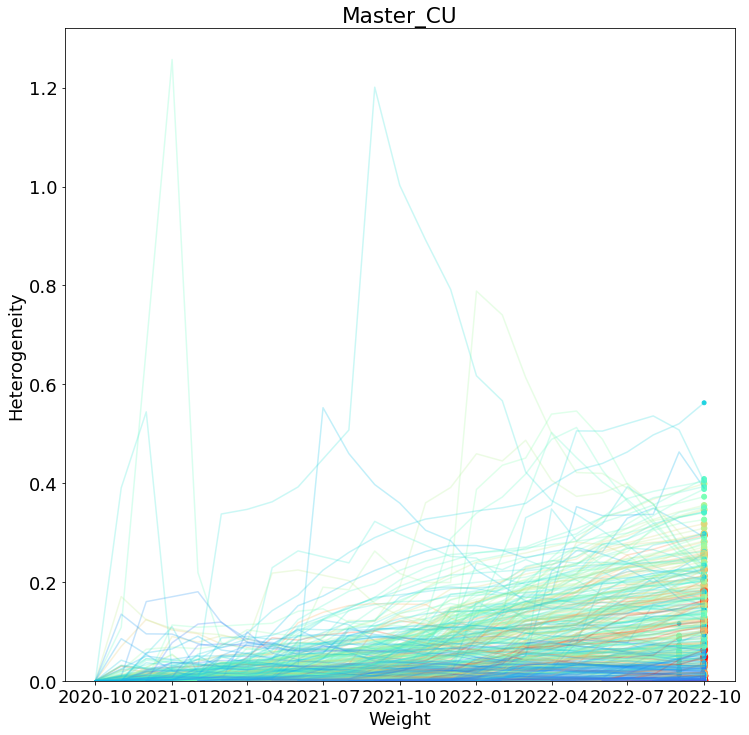

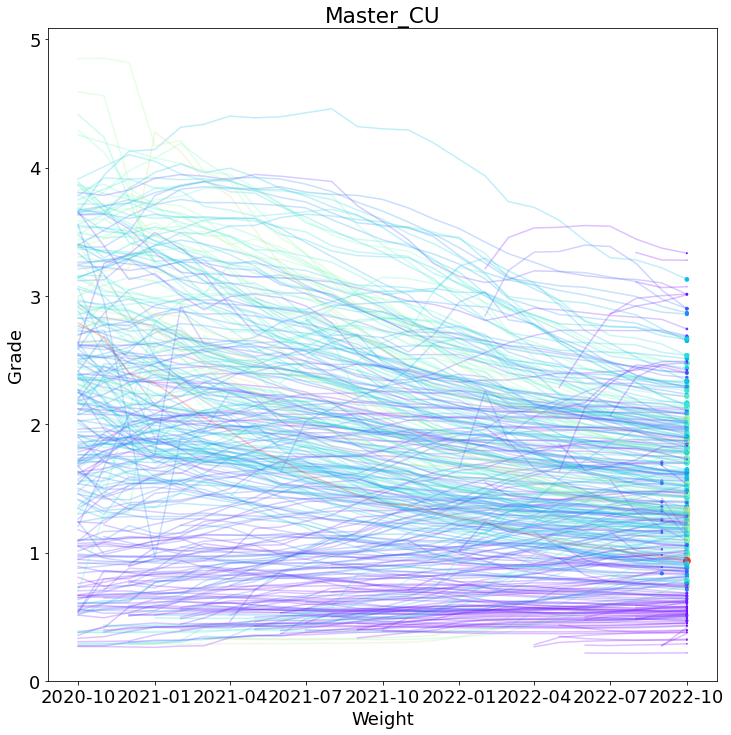

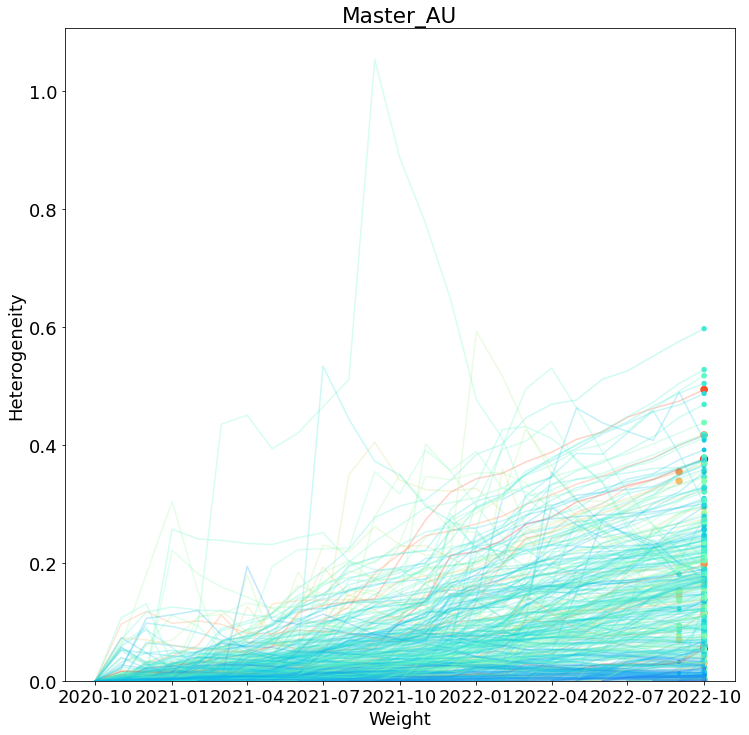

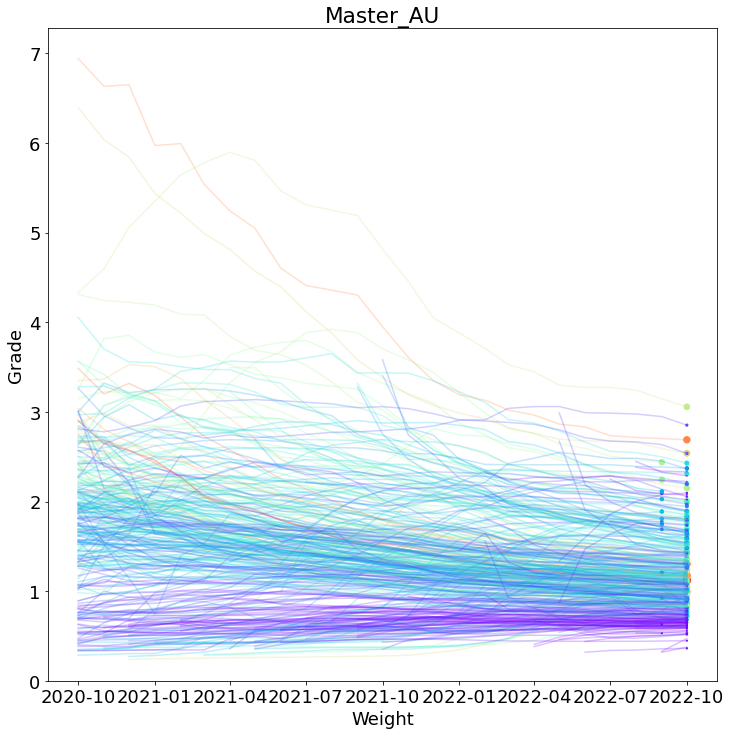

In [6]:

# if SAVE:
fig = plt.figure()
fig.set_size_inches(10, 8)

s = 3
alpha = 0.5

ms = 0.5
ma = 0.25

cmap = plt.colormaps.get('rainbow')
g_norm = colors.Normalize(vmin=0.0, vmax=3.0)
h_norm = colors.Normalize(vmin=0.0, vmax=0.6)

for element in elements:
    hw_master_fig = plt.figure()
    hw_master_fig.set_size_inches(12, 12)
    hw_master_ax = hw_master_fig.add_subplot()
    
    hw_master_ax.set_xlabel('Weight')
    hw_master_ax.set_ylabel('Heterogeneity')
    
    # hw_master_ax.set_facecolor('black')
    hw_master_ax.set_title(f'Master_{element}')
    
    gw_master_fig = plt.figure()
    gw_master_fig.set_size_inches(12, 12)
    gw_master_ax = gw_master_fig.add_subplot()
    
    gw_master_ax.set_xlabel('Weight')
    gw_master_ax.set_ylabel('Grade')
    
    # gw_master_ax.set_facecolor('lightgrey')
    gw_master_ax.set_title(f'Master_{element}')
    
    wf, hf, gf = [], [], []
    
    for dhid, dp_timeslices in timeslices.items():
        save_loc = output_dir + f'{dhid}/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        
        fig.clear()
        ax = fig.add_subplot()

        w, h, g = [], [], []
        for date, dp_timeslice in dp_timeslices.items():
            w.append(date) # dp_timeslice[element].get_cml_weight()
            h.append(dp_timeslice[element].get_heterogeneity())
            g.append(dp_timeslice[element].get_cml_grade())
        wf.append(w[-1])
        hf.append(h[-1])
        gf.append(g[-1])
        
        if len(w) > 0:
            ax.plot(w, h, alpha=alpha, c='red', ls='--')
            ax.scatter(w, h, c='red', s=s)

            # ax.set_xlim(0, max(w)) 
            # ax.set_xlabel('Weight')
            
            ax.set_xlim(min(w), max(w))
            ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
            ax.xaxis.set_minor_locator(mdates.MonthLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))
            ax.set_xlabel('Date')

            ax.set_ylim(0)
            ax.set_ylabel('Heterogeneity', c='red')

            sec_ax = ax.twinx()

            sec_ax.plot(w, g, alpha=alpha, c='blue', ls='--')
            sec_ax.scatter(w, g, c='blue', s=s)

            sec_ax.set_ylabel('Grade', c='blue')

            ax.set_title(f'{dhid}_{element}_HET={h[-1]:.2f}')
            fig.savefig(save_loc + f'{dhid}_{element}.svg', format='svg')
            
            # Add to masters
            final_g = g[-1]
            hw_master_ax.plot(w, h, c=cmap(g_norm(final_g)), alpha=ma)
            # hw_master_ax.scatter(w, h, c='black', s=ms, alpha=ma)
            
            final_h = h[-1]
            gw_master_ax.plot(w, g, c=cmap(h_norm(final_h)), alpha=ma)
            # gw_master_ax.scatter(w, g, c='black', s=ms, alpha=ma)

    hw_master_ax.scatter(wf, hf, color=cmap(g_norm(gf)), s=100*ms*g_norm(gf))
    
    # hw_master_ax.set_xlim(0)
    hw_master_ax.set_ylim(0)
    
    gw_master_ax.scatter(wf, gf, color=cmap(h_norm(hf)), s=100*ms*h_norm(hf))
    
    # gw_master_ax.set_xlim(0)
    gw_master_ax.set_ylim(0)
    
    
        # save_loc = output_dir + f'master/'    
        # if not os.path.exists(save_loc):
        #     os.makedirs(save_loc)      
        # hw_master_fig.savefig(save_loc + f'hw_master_{element}.svg', format='svg')
        # gw_master_fig.savefig(save_loc + f'gw_master_{element}.svg', format='svg')

In [7]:
# then we want to graph the mass yield curves for all the individual elements
no_of_graphs = len(elements)

if SAVE:
    fig = plt.figure()
    fig.set_size_inches(12, 12)

    s = 0.5
    alpha = 0.4

    for element in elements:
        fig.clear()
        ax = fig.add_subplot()
        ax_sec = ax.twinx()
        
        for dhid, drillhole in groups.items():
            if element in drillhole:
                plotter.scatter_g_r(ax, ax_sec, drillhole.resources[element].get_info(), s=s, alpha=alpha)
                
        plotter.set_g_r_labels(ax, ax_sec, element)
        ax.set_title(f'master_{element}')

        save_loc = output_dir + f'master/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'master_{element}.png', format='png', dpi=200)

In [8]:
# combined_data = {}

# for element in elements:
#     combined_data[element] = HetAnalysis(
#         f'combined_{element}_{index}', 
#         filtered_df['weight'].loc[:index], 
#         filtered_df[element].loc[:index]
#     )

In [9]:
# combined_data = Grouping('combined_data')
# flat_draw_tons = draw_tons.to_numpy().flatten()
# combined_data.add_resource("CU", flat_draw_tons, cu_pcbc.to_numpy().flatten())
# combined_data.add_resource("AU", flat_draw_tons, au_pcbc.to_numpy().flatten())

In [10]:
if SAVE:
    fig = plt.figure()
    fig.set_size_inches(8, 8)

    for element in elements:
        fig.clear()
        ax = fig.add_subplot()

        het = combined_data.resources[element].get_heterogeneity()
        df = combined_data.resources[element].get_info()
            
        if len(df) > 0:
            ax.set_title(f'combined_{element}_HET={het:.2f}')
            plotter.plot_grade_recovery_curve(ax, df, element)

            save_loc = output_dir + f'combined/'
            if not os.path.exists(save_loc):
                os.makedirs(save_loc)
            fig.savefig(save_loc + f'combined_{element}.png', format='png', dpi=200)

# Visualize

In [11]:
dp_coords = dp_coords.rename(
    columns={
        "Draw Point Name": "name", 
        "X-dpt": "x",
        'Y-dpt': 'y',
        'Z-dpt': 'z'
    }
)
dp_coords = dp_coords.set_index('name')

NameError: name 'dp_coords' is not defined

In [ ]:
for dhid, group in groups.items():
    if dhid not in list(dp_coords.index):
        print('dhid')

In [ ]:
hs = {}
for dpid in list(dp_coords.index):
    if dpid not in groups:
        for element in elements:
            if element not in hs:
                hs[element] = []
            hs[element].append(np.nan)
    else:
        dp = groups[dpid]
        for element in elements:
            if element not in hs:
                hs[element] = []
            if not dp:
                hs[element.append(np.nan)]
            else:
                if element in dp.resources:
                    dhr = dp.resources[element]
                    hs[element].append(dp.resources[element].get_heterogeneity())
                else:
                    hs[element].append(np.nan)

AttributeError: 'dict' object has no attribute 'resources'

In [ ]:
# %matplotlib qt


# fig = plt.figure()
# ax = plt.axes(projection='3d')

# element = 'CU'

# h = np.array(hs[element])

# # ax.scatter3D(
# #     dp_coords['x'], 
# #     dp_coords['y'], 
# #     dp_coords['z'],
# #     s=1,
# #     alpha=0.5,
# #     c='grey'
# # )
# # ax.set_title(element)
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.set_zlabel('z')

# x, y, z = dp_coords['x'], dp_coords['y'], dp_coords['z']

# col = []
# # cmap = colors.Colormap('viridis')

# import matplotlib
# cmap = matplotlib.cm.get_cmap('viridis')

# ch = np.array(h)
# ch = ch[~np.isnan(ch)]
# percentile90 = np.quantile(ch, 0.97)
# print(percentile90)
# def normalize(i: float):
#     return i / percentile90

# for het in h:
#     if not np.isnan(het):
#         col.append(cmap(normalize(het)))
#     else:
#         col.append((0.7, 0.7, 0.7, 0.1))

# # col = np.where(np.isnan(h), 'red', h)
# # ma_h = np.ma.array(h, mask=np.isnan(h))
# # cmap = plt.get_cmap('viridis').copy()
# # cmap.set_bad('grey',1.)

# p = ax.scatter3D(
#     x, 
#     y,
#     z, 
#     c=col,
#     # cmap=cmap,
#     s=40,
#     alpha=1
# )
# ax.set_title(element)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# # ax.set_zlim([2550, 2650])
# fig.colorbar(p)

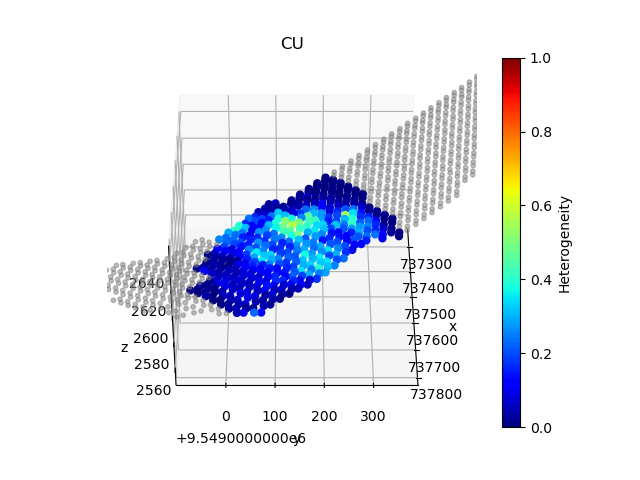

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

element = 'CU'

h = np.array(hs[element])
x, y, z = dp_coords['x'], dp_coords['y'], dp_coords['z']

cmap = plt.colormaps.get('winter')
nan = np.argwhere(np.isnan(h))

p = ax.scatter3D(
    x, 
    y,
    z, 
    c=h,
    vmax=1,
    cmap=cmap,
    s=25,
    alpha=1
)

# Set limits to the non-nan values
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
ax.set_zlim([2550, 2650])


nan = np.argwhere(np.isnan(h))
nan = nan.flatten()
ax.scatter3D(
    x[nan], 
    y[nan], 
    z[nan],
    s=10,
    alpha=0.5,
    c='grey'
)

ax.set_title(element)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.azim = 0
ax.elev = 40

# id = 'P08-04W'
# ax.scatter(x[id], y[id], z[id], marker='*', c='red', s=100)

cbar = fig.colorbar(p)
cbar.set_label('Heterogeneity')

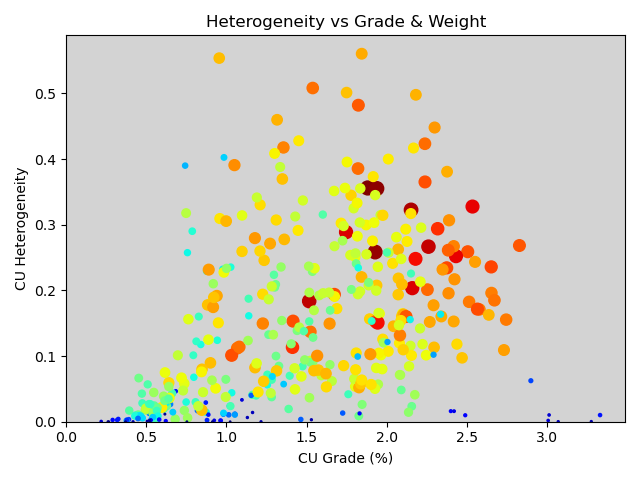

In [ ]:
element = 'CU'

x, y, w = [], [], []

for dhid, group in groups.items():
    x.append(group.resources[element].get_cml_grade())
    y.append(group.resources[element].get_heterogeneity())
    w.append(group.resources[element].get_cml_weight())
    
max_w = np.max(w)
scaled_w = 1 + (9 * (w / max_w))


fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, s=scaled_w**2, c=w, cmap=plt.colormaps.get('winter'))

ax.set_xlabel(f'{element} Grade (%)')
ax.set_xlim(0, None)

ax.set_ylabel(f'{element} Heterogeneity')
ax.set_ylim(0, None)

ax.set_title('Heterogeneity vs Grade & Weight')
ax.set_facecolor('lightgrey')

fig.tight_layout()

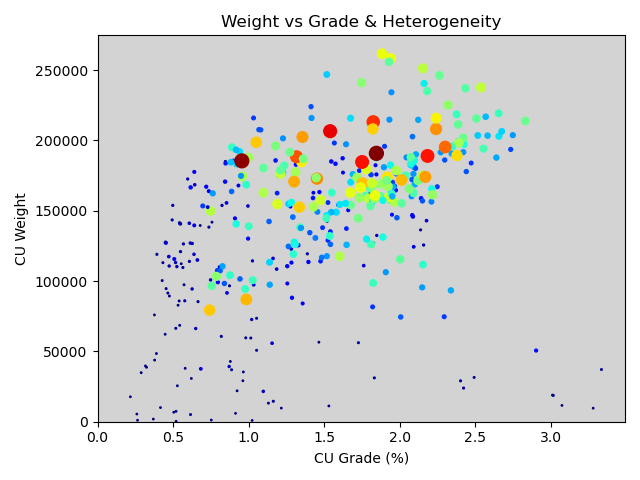

In [ ]:
element = 'CU'

x, y, h = [], [], []

for dhid, group in groups.items():
    x.append(group.resources[element].get_cml_grade())
    y.append(group.resources[element].get_cml_weight())
    h.append(group.resources[element].get_heterogeneity())
    
max_h = np.max(h)
scaled_h = 1 + (9 * (h / max_h))

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, s=scaled_h**2, c=h, cmap=plt.colormaps.get('winter'))

ax.set_xlabel(f'{element} Grade (%)')
ax.set_xlim(0, None)

ax.set_ylabel(f'{element} Weight')
ax.set_ylim(0, None)

ax.set_title('Weight vs Grade & Heterogeneity')
ax.set_facecolor('lightgrey')

fig.tight_layout()

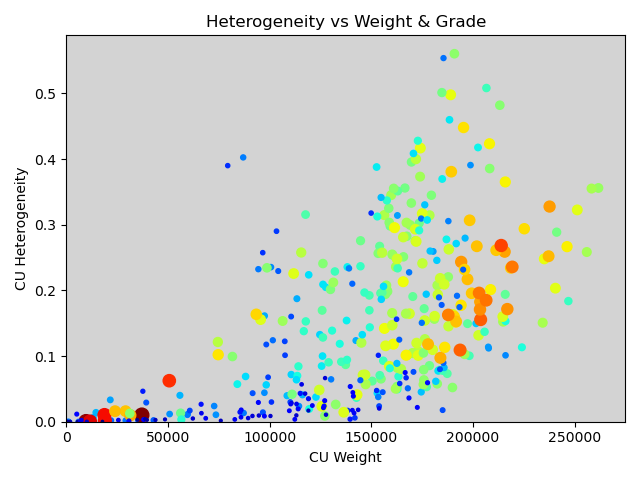

In [ ]:
element = 'CU'

x, y, g = [], [], []

for dhid, group in groups.items():
    x.append(group.resources[element].get_cml_weight())
    y.append(group.resources[element].get_heterogeneity())
    g.append(group.resources[element].get_cml_grade())
    
max_g = np.max(g)
scaled_g = 1 + (9 * (g / max_g))

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, s=scaled_g**2, c=g, cmap=plt.colormaps.get('winter'))

ax.set_xlabel(f'{element} Weight')
ax.set_xlim(0, None)

ax.set_ylabel(f'{element} Heterogeneity')
ax.set_ylim(0, None)

ax.set_title('Heterogeneity vs Weight & Grade')
ax.set_facecolor('lightgrey')

fig.tight_layout()